Dataset :\
https://www.kaggle.com/datasets/jangedoo/utkface-new \
Link:\
https://machinelearningmastery.com/keras-functional-api-deep-learning/

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
 98% 324M/331M [00:00<00:00, 555MB/s]
100% 331M/331M [00:00<00:00, 593MB/s]


In [3]:
import zipfile
zip = zipfile.ZipFile("/content/utkface-new.zip",'r')
zip.extractall("/content")
zip.close()

In [4]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
import os
import pandas as pd

# Set the path to the dataset
dataset_path = '/content/UTKFace'

# List all image files
image_files = [f for f in os.listdir(dataset_path) if f.endswith('.jpg')]

# Parse filenames to extract age and gender
data = []
for file in image_files:
    try:
        age, gender, _, _ = file.split('_')
        data.append({'filename': file, 'age': int(age), 'gender': int(gender)})
    except ValueError:
        continue  # Skip files that don't match the expected format

# Create a DataFrame
df = pd.DataFrame(data)


In [44]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image parameters
img_height, img_width = 200, 200
batch_size = 32

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Function to generate data
def generate_data(dataframe):
    while True:
        for start in range(0, len(dataframe), batch_size):
            end = min(start + batch_size, len(dataframe))
            batch_df = dataframe[start:end]
            images = []
            ages = []
            genders = []
            for _, row in batch_df.iterrows():
                img_path = os.path.join(dataset_path, row['filename'])
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
                img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
                images.append(img_array)
                ages.append(row['age'])
                genders.append(row['gender'])
            yield (np.array(images), {'age_output': np.array(ages), 'gender_output': np.array(genders)})


In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_layer = layers.Input(shape=(img_height, img_width, 3))
x = layers.Conv2D(32, (3,3), activation='relu')(input_layer)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(64, (3,3), activation='relu')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)

# Age output
age_output = layers.Dense(1, activation='linear', name='age_output')(x)

# Gender output
gender_output = layers.Dense(1, activation='sigmoid', name='gender_output')(x)

model = models.Model(inputs=input_layer, outputs=[age_output, gender_output])


In [47]:
model.compile(optimizer='adam',
              loss={'age_output': 'mse', 'gender_output': 'binary_crossentropy'},
              metrics={'age_output': 'mae', 'gender_output': 'accuracy'})


In [48]:
# Calculate steps per epoch
train_steps = len(train_df) // batch_size
test_steps = len(test_df) // batch_size

# Create generators
train_generator = generate_data(train_df)
test_generator = generate_data(test_df)

# Train the model
model.fit(train_generator,
          steps_per_epoch=train_steps,
          validation_data=test_generator,
          validation_steps=test_steps,
          epochs=10)


Epoch 1/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - age_output_loss: 334.6941 - age_output_mae: 13.7720 - gender_output_accuracy: 0.6642 - gender_output_loss: 0.6655 - loss: 335.3597 - val_age_output_loss: 169.5383 - val_age_output_mae: 9.5367 - val_gender_output_accuracy: 0.7449 - val_gender_output_loss: 0.4968 - val_loss: 170.0351
Epoch 2/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - age_output_loss: 152.2003 - age_output_mae: 9.2269 - gender_output_accuracy: 0.7973 - gender_output_loss: 0.4443 - loss: 152.8210 - val_age_output_loss: 128.4476 - val_age_output_mae: 8.4430 - val_gender_output_accuracy: 0.8309 - val_gender_output_loss: 0.3932 - val_loss: 128.8408
Epoch 3/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - age_output_loss: 121.2471 - age_output_mae: 8.1917 - gender_output_accuracy: 0.8149 - gender_output_loss: 0.4459 - loss: 121.8359 - val_age_output_loss: 127.2783 - val_age_output_mae: 8.3211 - val_gender_output_accuracy: 0.7933 - val_gender_output_loss: 0.5048 - val_

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
test_img = cv2.imread('/content/person.jpg')

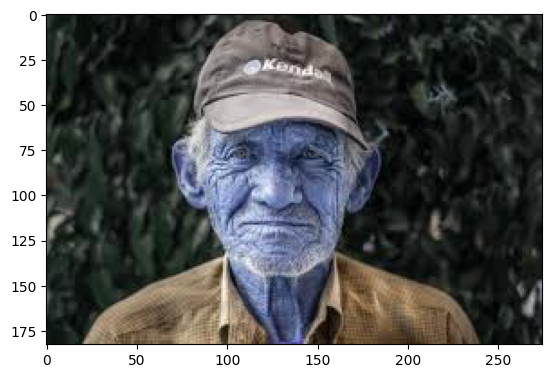

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(183, 275, 3)

In [ ]:
test_img = cv2.resize(test_img,(200,200))

In [ ]:
test_input = test_img.reshape((1,200,200,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 3s 3s/step


[array([[11.911736]], dtype=float32), array([[0.32429215]], dtype=float32)]